In [36]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anees\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
questions_df = pd.read_csv('power_user_responses.csv.csv')
questions_df.head().T

,0,1,2,3,4
Title,How to find 3D normal distribution function fr...,Implementation of Gaussian process,Name of mean absolute error analogue to Brier ...,How do I sample without replacement using a sa...,Sampling variables and calculating likelihood ...
Tags,<dataset>,<java><gaussian-process>,<classification><error><validation><scoring-ru...,<r><sampling><rejection-sampling>,<bayesian><sampling><bugs><gibbs>
Body,<p>I have a series of three dimensional data l...,<p>i try to implement a simple gaussian proces...,"<p>Yesterday's question <a href=""https://stats...",<p>I vaguely recall from grad school that the ...,"<p>I am trying to read some <a href=""http://ww..."
Id,20570,20579,20581,20590,20593
AcceptedAnswerId,20573,20582,20614,20592,20603
user4253_flag,0,0,0,0,0
user4257_flag,0,0,0,0,0
user4376_flag,0,0,0,0,0
user4505_flag,0,0,0,0,0
user10849_flag,0,0,0,0,0


In [42]:
questions_df.rename(columns = {'Title':'q_title', 'Body':'q_body', 'Tags':'q_tags', 'Id':'q_id', 'AcceptedAnswerId':'accepted_a_id'}, inplace=True)

In [43]:
questions_df.head()

,q_title,q_tags,q_body,q_id,accepted_a_id,user4253_flag,user4257_flag,user4376_flag,user4505_flag,user10849_flag,...,user61092_flag,user9394_flag,user9964_flag,user11852_flag,user11887_flag,user23853_flag,user28666_flag,user28746_flag,user36041_flag,user86652_flag
0,How to find 3D normal distribution function fr...,<dataset>,<p>I have a series of three dimensional data l...,20570,20573.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Implementation of Gaussian process,<java><gaussian-process>,<p>i try to implement a simple gaussian proces...,20579,20582.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Name of mean absolute error analogue to Brier ...,<classification><error><validation><scoring-ru...,"<p>Yesterday's question <a href=""https://stats...",20581,20614.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,How do I sample without replacement using a sa...,<r><sampling><rejection-sampling>,<p>I vaguely recall from grad school that the ...,20590,20592.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Sampling variables and calculating likelihood ...,<bayesian><sampling><bugs><gibbs>,"<p>I am trying to read some <a href=""http://ww...",20593,20603.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
questions_df['answered'] = (pd.isnull(questions_df['accepted_a_id']) == False)*1

In [60]:
questions = questions_df[['q_id', 'q_body', 'q_title', 'q_tags','answered']].copy()
questions.head()

,q_id,q_body,q_title,q_tags,answered
0,20570,<p>I have a series of three dimensional data l...,How to find 3D normal distribution function fr...,<dataset>,1
1,20579,<p>i try to implement a simple gaussian proces...,Implementation of Gaussian process,<java><gaussian-process>,1
2,20581,"<p>Yesterday's question <a href=""https://stats...",Name of mean absolute error analogue to Brier ...,<classification><error><validation><scoring-ru...,1
3,20590,<p>I vaguely recall from grad school that the ...,How do I sample without replacement using a sa...,<r><sampling><rejection-sampling>,1
4,20593,"<p>I am trying to read some <a href=""http://ww...",Sampling variables and calculating likelihood ...,<bayesian><sampling><bugs><gibbs>,1


In [61]:
questions['q_body'] = questions['q_body'].apply(lambda x: x.lower().replace('-', ' '))
questions['q_title'] = questions['q_title'].apply(lambda x: x.lower().replace('-', ' '))
questions['q_tags'] = questions['q_tags'].apply(lambda x: x.lower())

In [62]:
# soup = BeautifulSoup(questions.query('q_id == 2617')['q_body'].values[0], 'html.parser')
# soup
#soup.Prettyprint

In [63]:
def extract_body_words(body):
    words = []
    for paragraph in BeautifulSoup(body, 'html.parser').findAll(['p','li']):
        for word in re.sub('[()]','',paragraph.text).split():
            words.append(word)
    return words

In [64]:
questions['q_body_words'] = questions['q_body'].apply(lambda x: [word for word in extract_body_words(x) 
                                                                 if word not in stop_words])
questions['q_title_words'] = questions['q_title'].apply(lambda x: re.sub('[()]','', x).split())

questions['n_chars_body'] = questions['q_body'].apply(lambda x: len(x))
questions['n_words_body'] = questions['q_body_words'].apply(lambda x: len(x))

questions['n_chars_title'] = questions['q_title'].apply(lambda x: len(x))
questions['n_words_title'] = questions['q_title_words'].apply(lambda x: len(x))


In [65]:
questions['q_tags'] = [tags.replace('-',' ').split('><') for tags in questions['q_tags']]
questions['q_tags'] = questions['q_tags'].apply(lambda tags: [re.sub('[<>]','',tag) if not re.sub('[<>]','',tag) == 'r' 
                                                              else ' r ' for tag in tags])
questions['q_tags'] = questions['q_tags'].apply(lambda tags: [tag if not tag == 'c++' else 'c\+\+' for tag in tags])

questions['n_tags'] = questions['q_tags'].apply(lambda x: len(pd.unique(x)))

questions['n_tags_body'] = questions[['q_body','q_tags']].apply(lambda x: len([found_tag for tag in x['q_tags'] 
                                                                for found_tag in re.findall(tag, x['q_body'])]), axis = 1)
questions['n_tags_title'] = questions[['q_title','q_tags']].apply(lambda x: len([found_tag for tag in x['q_tags'] 
                                                                for found_tag in re.findall(tag, x['q_title'])]), axis = 1)

In [66]:
questions['n_paragraphs_body'] = questions['q_body'].apply(lambda x: len(BeautifulSoup(x, 'html.parser').findAll(['p','li'])))
questions['n_code_snippets'] = questions['q_body'].apply(lambda x: len(BeautifulSoup(x, 'html.parser').findAll(['code'])))
questions['n_plots'] = questions['q_body'].apply(lambda x: len(BeautifulSoup(x, 'html.parser').findAll(['img'])))

In [67]:
questions['n_stop_words_body'] = questions['q_body'].apply(lambda x: len([word for word in 
                                                                          extract_body_words(x) if word in stop_words]))
questions['n_words_body'] = questions['n_words_body'].apply(lambda x: max(x,1))
questions['verbosity'] = questions['n_stop_words_body']/questions['n_words_body']


In [68]:
questions.head().T

,0,1,2,3,4
q_id,20570,20579,20581,20590,20593
q_body,<p>i have a series of three dimensional data l...,<p>i try to implement a simple gaussian proces...,"<p>yesterday's question <a href=""https://stats...",<p>i vaguely recall from grad school that the ...,"<p>i am trying to read some <a href=""http://ww..."
q_title,how to find 3d normal distribution function fr...,implementation of gaussian process,name of mean absolute error analogue to brier ...,how do i sample without replacement using a sa...,sampling variables and calculating likelihood ...
q_tags,[dataset],"[java, gaussian process]","[classification, error, validation, scoring ru...","[ r , sampling, rejection sampling]","[bayesian, sampling, bugs, gibbs]"
answered,1,1,1,1,1
q_body_words,"[series, three, dimensional, data, like, so:, ...","[try, implement, simple, gaussian, process, re...","[yesterday's, question, determine, accuracy, m...","[vaguely, recall, grad, school, following, val...","[trying, read, winbugs/openbugs, examples, fig..."
q_title_words,"[how, to, find, 3d, normal, distribution, func...","[implementation, of, gaussian, process]","[name, of, mean, absolute, error, analogue, to...","[how, do, i, sample, without, replacement, usi...","[sampling, variables, and, calculating, likeli..."
n_chars_body,806,3797,548,2404,1340
n_words_body,53,65,32,135,75
n_chars_title,69,34,52,79,65


In [69]:
questions['ques_marks_title'] = questions['q_title'].apply(lambda x: len(re.findall('\?', x)))
questions['ques_marks_body'] = questions['q_body'].apply(lambda x: len(re.findall('\?', x)))
questions.head().T

,0,1,2,3,4
q_id,20570,20579,20581,20590,20593
q_body,<p>i have a series of three dimensional data l...,<p>i try to implement a simple gaussian proces...,"<p>yesterday's question <a href=""https://stats...",<p>i vaguely recall from grad school that the ...,"<p>i am trying to read some <a href=""http://ww..."
q_title,how to find 3d normal distribution function fr...,implementation of gaussian process,name of mean absolute error analogue to brier ...,how do i sample without replacement using a sa...,sampling variables and calculating likelihood ...
q_tags,[dataset],"[java, gaussian process]","[classification, error, validation, scoring ru...","[ r , sampling, rejection sampling]","[bayesian, sampling, bugs, gibbs]"
answered,1,1,1,1,1
q_body_words,"[series, three, dimensional, data, like, so:, ...","[try, implement, simple, gaussian, process, re...","[yesterday's, question, determine, accuracy, m...","[vaguely, recall, grad, school, following, val...","[trying, read, winbugs/openbugs, examples, fig..."
q_title_words,"[how, to, find, 3d, normal, distribution, func...","[implementation, of, gaussian, process]","[name, of, mean, absolute, error, analogue, to...","[how, do, i, sample, without, replacement, usi...","[sampling, variables, and, calculating, likeli..."
n_chars_body,806,3797,548,2404,1340
n_words_body,53,65,32,135,75
n_chars_title,69,34,52,79,65


In [70]:
questions.to_pickle('all_question.pkl')

In [71]:
questions = pd.read_pickle('all_question.pkl')

In [72]:
questions.head().T

,0,1,2,3,4
q_id,20570,20579,20581,20590,20593
q_body,<p>i have a series of three dimensional data l...,<p>i try to implement a simple gaussian proces...,"<p>yesterday's question <a href=""https://stats...",<p>i vaguely recall from grad school that the ...,"<p>i am trying to read some <a href=""http://ww..."
q_title,how to find 3d normal distribution function fr...,implementation of gaussian process,name of mean absolute error analogue to brier ...,how do i sample without replacement using a sa...,sampling variables and calculating likelihood ...
q_tags,[dataset],"[java, gaussian process]","[classification, error, validation, scoring ru...","[ r , sampling, rejection sampling]","[bayesian, sampling, bugs, gibbs]"
answered,1,1,1,1,1
q_body_words,"[series, three, dimensional, data, like, so:, ...","[try, implement, simple, gaussian, process, re...","[yesterday's, question, determine, accuracy, m...","[vaguely, recall, grad, school, following, val...","[trying, read, winbugs/openbugs, examples, fig..."
q_title_words,"[how, to, find, 3d, normal, distribution, func...","[implementation, of, gaussian, process]","[name, of, mean, absolute, error, analogue, to...","[how, do, i, sample, without, replacement, usi...","[sampling, variables, and, calculating, likeli..."
n_chars_body,806,3797,548,2404,1340
n_words_body,53,65,32,135,75
n_chars_title,69,34,52,79,65


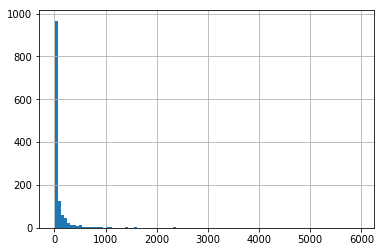

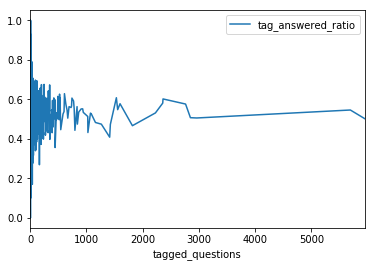

In [73]:
all_tags = [tag for tags in list(questions['q_tags']) for tag in tags]
all_tags = pd.DataFrame(pd.Series(all_tags).value_counts())
all_tags.columns = ['tagged_questions']

answered_tags = [tag for tags in list(questions[questions['answered'] == 1]['q_tags']) for tag in tags]
answered_tags = pd.DataFrame(pd.Series(answered_tags).value_counts())
answered_tags.columns = ['answered_questions']

all_tags = all_tags.join(answered_tags).fillna(0)

all_tags['tag_answered_ratio'] = all_tags['answered_questions'] / all_tags['tagged_questions']

all_tags['tagged_questions'].hist(bins = 100)
all_tags.plot(y = 'tag_answered_ratio', x = 'tagged_questions')

In [74]:
all_tags.describe(percentiles = np.arange(0,1,0.05))

,tagged_questions,answered_questions,tag_answered_ratio
count,1311.000000,1311.000000,1311.000000
mean,98.361556,52.234935,0.526827
std,332.516825,176.647006,0.218618
min,1.000000,0.000000,0.000000
0%,1.000000,0.000000,0.000000
5%,1.000000,0.000000,0.000000
10%,2.000000,1.000000,0.285714
15.0%,3.000000,1.000000,0.349419
20%,4.000000,2.000000,0.400000
25%,5.000000,3.000000,0.434783


In [75]:
all_tags['tag_popularity'] = pd.cut(all_tags['tagged_questions'], bins = [0,300,1000,2000,5000,200000], labels = [0,1,2,3,4])
# all_tags['tag_certainty'] = pd.cut(all_tags['tag_answered_ratio'], bins = [0,300,1000,2000,5000,200000], labels = [0,1,2,3,4])

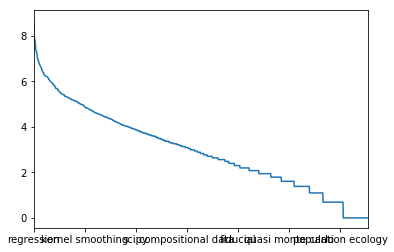

In [76]:
np.log(all_tags['tagged_questions']).plot()

In [77]:
tag_popularity = dict(all_tags['tag_popularity'])
tag_popularity_score = dict(all_tags['tagged_questions'])
tag_answered_ratio = dict(all_tags['tag_answered_ratio'])
questions['min_tag_popularity'] = questions['q_tags'].apply(lambda tags: min([tag_popularity[tag] for tag in tags]))
questions['min_tag_popularity_score'] = questions['q_tags'].apply(lambda tags: min([tag_popularity_score[tag] for tag in tags]))
questions['min_tag_answered_ratio'] = questions['q_tags'].apply(lambda tags: min([tag_answered_ratio[tag] for tag in tags]))
questions['max_tag_popularity'] = questions['q_tags'].apply(lambda tags: max([tag_popularity[tag] for tag in tags]))
questions['max_tag_popularity_score'] = questions['q_tags'].apply(lambda tags: max([tag_popularity_score[tag] for tag in tags]))
questions['max_tag_answered_ratio'] = questions['q_tags'].apply(lambda tags: max([tag_answered_ratio[tag] for tag in tags]))

questions.head().T

,0,1,2,3,4
q_id,20570,20579,20581,20590,20593
q_body,<p>i have a series of three dimensional data l...,<p>i try to implement a simple gaussian proces...,"<p>yesterday's question <a href=""https://stats...",<p>i vaguely recall from grad school that the ...,"<p>i am trying to read some <a href=""http://ww..."
q_title,how to find 3d normal distribution function fr...,implementation of gaussian process,name of mean absolute error analogue to brier ...,how do i sample without replacement using a sa...,sampling variables and calculating likelihood ...
q_tags,[dataset],"[java, gaussian process]","[classification, error, validation, scoring ru...","[ r , sampling, rejection sampling]","[bayesian, sampling, bugs, gibbs]"
answered,1,1,1,1,1
q_body_words,"[series, three, dimensional, data, like, so:, ...","[try, implement, simple, gaussian, process, re...","[yesterday's, question, determine, accuracy, m...","[vaguely, recall, grad, school, following, val...","[trying, read, winbugs/openbugs, examples, fig..."
q_title_words,"[how, to, find, 3d, normal, distribution, func...","[implementation, of, gaussian, process]","[name, of, mean, absolute, error, analogue, to...","[how, do, i, sample, without, replacement, usi...","[sampling, variables, and, calculating, likeli..."
n_chars_body,806,3797,548,2404,1340
n_words_body,53,65,32,135,75
n_chars_title,69,34,52,79,65


In [78]:
final_question_metrics = questions[[x for x in questions.columns if x not in ['q_body', 'q_title', 'q_tags', 'q_body_words', 'q_title_words']]]
final_question_metrics.head().T

,0,1,2,3,4
q_id,20570.000000,20579.000000,20581.000000,20590.000000,20593.000000
answered,1.000000,1.000000,1.000000,1.000000,1.000000
n_chars_body,806.000000,3797.000000,548.000000,2404.000000,1340.000000
n_words_body,53.000000,65.000000,32.000000,135.000000,75.000000
n_chars_title,69.000000,34.000000,52.000000,79.000000,65.000000
n_words_title,13.000000,4.000000,9.000000,12.000000,7.000000
n_tags,1.000000,2.000000,5.000000,3.000000,4.000000
n_tags_body,0.000000,3.000000,3.000000,3.000000,5.000000
n_tags_title,0.000000,1.000000,2.000000,1.000000,3.000000
n_paragraphs_body,4.000000,7.000000,2.000000,13.000000,2.000000


In [81]:
final_df = pd.merge(final_question_metrics, questions_df[[x for x in questions_df.columns 
                                  if x not in ['q_body', 'q_title', 'q_tags', 'answered']]], on = 'q_id', how = 'inner')
final_df.head()

,q_id,answered,n_chars_body,n_words_body,n_chars_title,n_words_title,n_tags,n_tags_body,n_tags_title,n_paragraphs_body,...,user61092_flag,user9394_flag,user9964_flag,user11852_flag,user11887_flag,user23853_flag,user28666_flag,user28746_flag,user36041_flag,user86652_flag
0,20570,1,806,53,69,13,1,0,0,4,...,0,0,0,0,0,0,0,0,0,0
1,20579,1,3797,65,34,4,2,3,1,7,...,0,0,0,0,0,0,0,0,0,0
2,20581,1,548,32,52,9,5,3,2,2,...,0,0,0,0,0,0,0,0,0,0
3,20590,1,2404,135,79,12,3,3,1,13,...,0,0,0,0,0,0,0,0,0,0
4,20593,1,1340,75,65,7,4,5,3,2,...,0,0,0,0,0,0,0,0,0,0


In [82]:
final_df.shape

(42739, 127)

In [83]:
final_df.to_csv('question_metrics_power_users.csv',index=False)

In [84]:
final_question_metrics[pd.isnull(final_question_metrics['verbosity'])==True]

,q_id,answered,n_chars_body,n_words_body,n_chars_title,n_words_title,n_tags,n_tags_body,n_tags_title,n_paragraphs_body,...,n_stop_words_body,verbosity,ques_marks_title,ques_marks_body,min_tag_popularity,min_tag_popularity_score,min_tag_answered_ratio,max_tag_popularity,max_tag_popularity_score,max_tag_answered_ratio
